In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

**LOADING THE DATASET**

In [ ]:
df = pd.read_excel("Key Stroke Dataset.xlsx")
df.head()

,click_id,timestamp,user_id,ip_address,device_type,browser,operating_system,referrer_url,page_url,click_duration,...,mouse_movement,keystrokes_detected,ad_position,click_frequency,time_since_last_click,device_ip_reputation,VPN_usage,proxy_usage,bot_likelihood_score,is_fraudulent
0,d875835d-3a4a-4a20-b0d1-6cddf89afc6a,2024-08-23 02:47:39,65a2f621-707b-49be-9c3e-ccac0b1d89ef,141.36.49.37,Tablet,Safari,Android,https://evans-ford.com/,http://www.turner-stewart.com/,0.29,...,111,8,Bottom,7,72,Good,0,1,0.29,0
1,a2d3f028-7790-4be1-9f75-df1357edbbdb,2025-01-30 23:23:50,135e0114-76c5-43ea-bdef-80ab537dc009,216.29.19.201,Desktop,Opera,iOS,https://pierce-ferguson.net/,http://www.rodriguez.biz/,0.64,...,452,29,Bottom,9,201,Suspicious,0,0,0.74,0
2,36d787b2-fbce-43ef-8c02-7c8746d7e3db,2025-01-21 05:41:12,a6922984-78cb-4c01-9c88-bfe3a13a0aaf,167.133.41.231,Tablet,Safari,Linux,https://www.martinez.com/,https://beck.biz/,0.42,...,431,18,Bottom,9,326,Good,0,1,0.14,0
3,01fc0078-096b-4f90-82ae-aa8085b719ac,2024-10-12 08:18:14,d30788b2-4048-4770-a4b1-a9358788818f,216.146.33.78,Tablet,Edge,macOS,https://jones-mendoza.com/,https://www.alvarado.com/,4.29,...,472,37,Side,4,33,Suspicious,0,0,0.65,0
4,0afdf2af-0b48-47d5-bfb6-e087053e1eb9,2024-04-19 14:44:35,dfc42287-6325-4344-b373-b8e61ea6e5c1,146.37.54.245,Desktop,Opera,Windows,https://www.griffith-holloway.com/,http://gonzalez.com/,2.46,...,50,2,Side,7,97,Good,0,0,0.06,0


**FEATURE SELECTION AND DATA SCALING**

In [ ]:
# Target
y_true = df['is_fraudulent']

# Selecting only numeric behavioral features
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['is_fraudulent'])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**MODEL TRAINING**

In [ ]:
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=y_true.mean(),
    random_state=42
)

iso_forest.fit(X_scaled)

IsolationForest(contamination=np.float64(0.2482), random_state=42)

In [ ]:
# Isolation Forest output: 1 (normal), -1 (anomaly)
pred = iso_forest.predict(X_scaled)
print("Isolation Forest Output:",pred)

# Converting to binary: 1 = fraud, 0 = genuine
y_pred = (pred == -1).astype(int)
print("Output after converting to binary:",y_pred)

Isolation Forest Output: [ 1  1 -1 ...  1  1 -1]
Output after converting to binary: [0 0 1 ... 0 0 1]


**ACCURACY**

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6368


**EVALUATING THE MODEL AND PLOTTING THE GRAPH**

In [ ]:
#Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      3759
           1       0.27      0.27      0.27      1241

    accuracy                           0.64      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.64      0.64      0.64      5000



In [ ]:
# ROC–AUC Score (using anomaly score)
anomaly_score = -iso_forest.decision_function(X_scaled)
print("ROC AUC Score:", roc_auc_score(y_true, anomaly_score))

ROC AUC Score: 0.5662704968725073


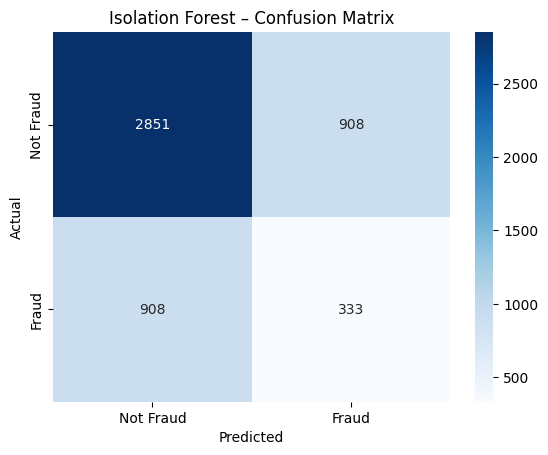

In [ ]:
# Confusion Matrix
sns.heatmap(
    confusion_matrix(y_true, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Fraud', 'Fraud'],
    yticklabels=['Not Fraud', 'Fraud']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Isolation Forest – Confusion Matrix')
plt.show()